In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import librosa.display
import soundfile as sf
import sounddevice as sd

### 1. Constant-Q spectrogram and chromagram (1 point)

#### a) Load 'brahms_hungarian_dance_5_short.wav'

In [2]:

audio, sr = librosa.load('brahms_hungarian_dance_5_short.wav')

#### b) Calculate the spectrogram

In [3]:
spec = librosa.core.stft(audio)

#### c) Calculate the constant-Q spectrogram

In [4]:
cqt_spec = librosa.core.cqt(audio, sr=sr)

#### d) Calculate the chromagram

In [7]:
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

#### e) Plot, observe and report differences.

C:\Users\praba\AppData\Local\Temp\ipykernel_5780\3788424151.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time')


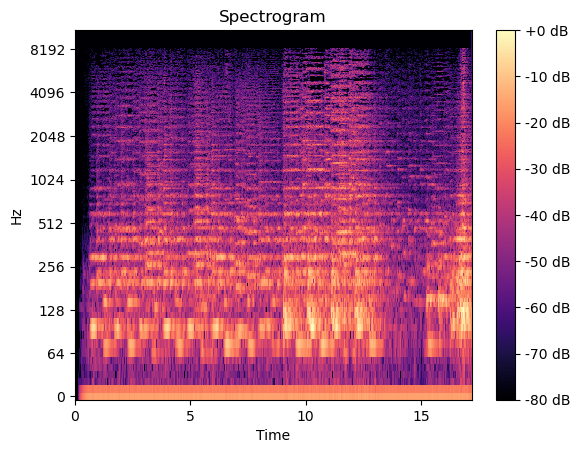

C:\Users\praba\AppData\Local\Temp\ipykernel_5780\3788424151.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), y_axis='cqt_note', x_axis='time')


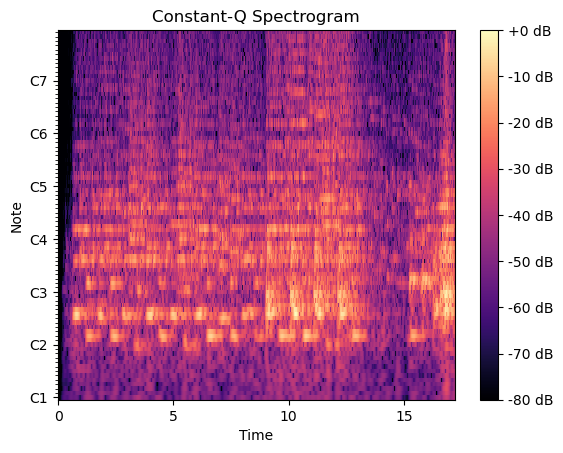

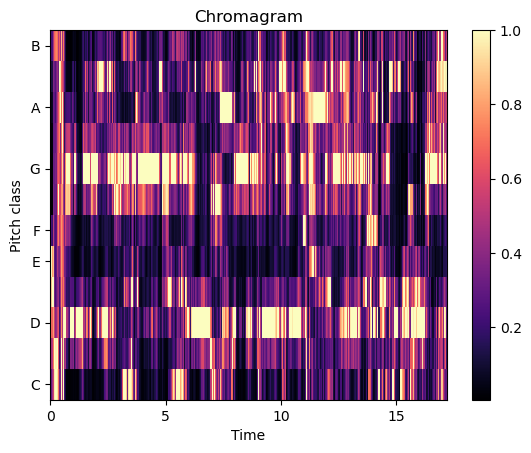

In [9]:

librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

librosa.display.specshow(librosa.amplitude_to_db(cqt_spec, ref=np.max), y_axis='cqt_note', x_axis='time')
plt.title('Constant-Q Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Chromagram')
plt.colorbar()
plt.show()

### 2. Onset detection (1 point)

#### a.1) load the audio file

In [10]:
audio, sr = librosa.load('classic_rock_beat.wav')

#### a.2) Compute spectral novelty function

In [11]:
onset_strength = librosa.onset.onset_strength(y=audio, sr=sr)

#### a.3) Pick peaks

In [14]:
onset_frames = librosa.util.peak_pick(onset_strength, pre_max=20, post_max=20, pre_avg=20, post_avg=20, delta=0.5, wait=0)

#### a.4) Convert frame indexes into time indexes

In [15]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

#### a.5) Plot onsets on top of the time domain signal. Report observations.

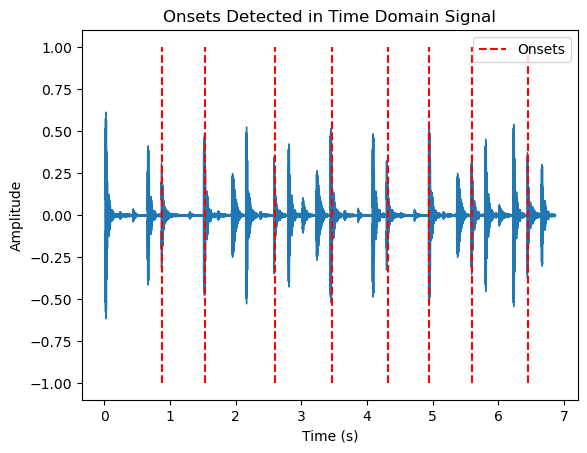

In [16]:
librosa.display.waveshow(audio, sr=sr)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.title('Onsets Detected in Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#### a.6) Plot onsets on top of the spectrogram. Report observations.

C:\Users\praba\AppData\Local\Temp\ipykernel_5780\3825110115.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


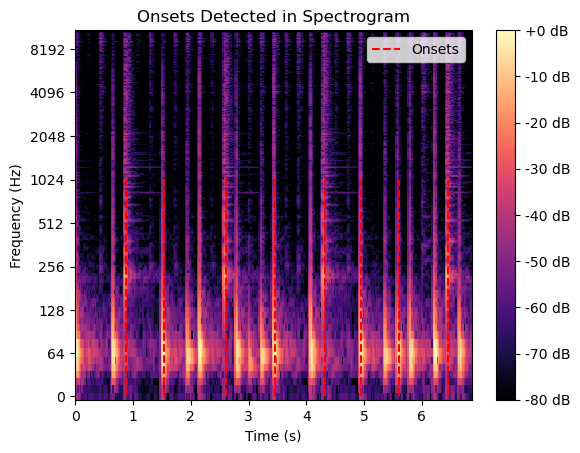

In [17]:
D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.vlines(onset_times, ymin=0, ymax=D.shape[0], color='r', linestyle='--', label='Onsets')
plt.title('Onsets Detected in Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()

### Add clicks to the onsets

#### b.1) Create a signal consisting of clicks at specified locations.

In [18]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(audio))

#### b.2) Add the two signals together.

In [19]:
music_with_clicks = audio + clicks

#### b.2) Play it.

In [21]:
sd.play(music_with_clicks, sr)

#### b.3) Stack them to create stereo signal.

In [22]:
sd.wait()
stereo_signal = np.vstack([audio, clicks])

#### b.3) Play it.

In [23]:
sd.play(stereo_signal.T, sr)

### Bonus problem: Implement your own spectral novelty function